# Task 4 — Feature Engineering & Data Preparation
This notebook prepares the dataset for predictive modeling:
- Handle missing values
- Encode categorical variables
- Create derived features
- Normalize numeric variables
- Split dataset into train/test


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
data_path = r'C:\Users\ruham\Downloads\AlphaCare-Insurance-week-3\AlphaCare-Insurance-week-3\data\processed\MachineLearningRating_v3.csv'
df = pd.read_csv(data_path)  # <- You need this

# Check column names
print(df.columns)

# Make sure 'TotalClaims' exists
if 'TotalClaims' not in df.columns:
    raise ValueError("Column 'TotalClaims' not found. Check CSV file.")

# Subset for severity model: only rows with claims > 0
df_severity = df[df['TotalClaims'] > 0].copy()

# Handle missing values (example: fill numerical NaNs with 0)
df_severity.fillna(0, inplace=True)

# Feature engineering: example, vehicle age
df_severity['VehicleAge'] = 2025 - df_severity['RegistrationYear']

# Encode categorical variables (example: one-hot encoding for 'Gender' and 'VehicleType')
df_model = pd.get_dummies(df_severity, columns=['Gender', 'VehicleType'], drop_first=True)

# Define X and y for claim severity
X = df_model.drop(columns=['TotalClaims', 'CalculatedPremiumPerTerm'])  # drop target and premium
y = df_model['TotalClaims']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [28]:

print(X_train.head())

        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
68824                 18873      1069  2014-12-01 00:00:00            False   
49040                241406     21200  2015-06-01 00:00:00            False   
242206               166291     14254  2015-07-01 00:00:00            False   
213156               119459     10116  2015-04-01 00:00:00            False   
21161                166513     14181  2015-06-01 00:00:00            False   

        Citizenship   LegalType Title Language          Bank      AccountType  \
68824           0.0  Individual    Mr  English     ABSA Bank  Current account   
49040           0.0  Individual    Mr  English             0                0   
242206          0.0  Individual    Mr  English  Capitec Bank  Savings account   
213156          0.0  Individual    Mr  English     ABSA Bank  Savings account   
21161           0.0  Individual    Mr  English             0                0   

        ...                   Section 

In [29]:
print(y_train.head())


68824      38541.078947
49040     140662.368421
242206      6140.350877
213156       750.649123
21161      97357.631579
Name: TotalClaims, dtype: float64


In [30]:
print(X_train.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'VehicleAge', 'Gender_Not specified', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle']


In [6]:
# Check missing values
missing_counts = X_train.isnull().sum()
missing_percent = (missing_counts / X_train.shape[0]) * 100
missing_summary = pd.DataFrame({'MissingCount': missing_counts, 'MissingPercent': missing_percent})
print(missing_summary[missing_summary['MissingCount'] > 0])

# Impute numerical features with median
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if X_train[col].isnull().sum() > 0:
        X_train[col].fillna(X_train[col].median(), inplace=True)
        X_test[col].fillna(X_train[col].median(), inplace=True)

# Impute categorical features with 'Unknown'
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
for col in categorical_cols:
    if X_train[col].isnull().sum() > 0:
        X_train[col].fillna('Unknown', inplace=True)
        X_test[col].fillna('Unknown', inplace=True)

# Verify all missing values are handled
print("Remaining missing values:", X_train.isnull().sum().sum())

Empty DataFrame
Columns: [MissingCount, MissingPercent]
Index: []
Remaining missing values: 0


In [7]:
print(X_train.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'VehicleAge', 'Gender_Not specified', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle']


In [8]:
# Columns to encode (only those present in X_train)
categorical_cols = ['Province', 'Bank', 'AccountType', 'CoverType']

# Use pandas get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Make sure both train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Replace X_train and X_test with encoded versions
X_train = X_train_encoded
X_test = X_test_encoded

print(X_train.shape)
print(X_train.head())

(630, 70)
        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
68824                 18873      1069  2014-12-01 00:00:00            False   
49040                241406     21200  2015-06-01 00:00:00            False   
242206               166291     14254  2015-07-01 00:00:00            False   
213156               119459     10116  2015-04-01 00:00:00            False   
21161                166513     14181  2015-06-01 00:00:00            False   

        Citizenship   LegalType Title Language  MaritalStatus       Country  \
68824           0.0  Individual    Mr  English  Not specified  South Africa   
49040           0.0  Individual    Mr  English  Not specified  South Africa   
242206          0.0  Individual    Mr  English  Not specified  South Africa   
213156          0.0  Individual    Mr  English  Not specified  South Africa   
21161           0.0  Individual    Mr  English  Not specified  South Africa   

        ...  Bank_Nedbank Bank_Standard 

In [9]:
# Convert TransactionMonth to year and month numeric columns
X_train['TransactionYear'] = pd.to_datetime(X_train['TransactionMonth']).dt.year
X_train['TransactionMonthNum'] = pd.to_datetime(X_train['TransactionMonth']).dt.month
X_test['TransactionYear'] = pd.to_datetime(X_test['TransactionMonth']).dt.year
X_test['TransactionMonthNum'] = pd.to_datetime(X_test['TransactionMonth']).dt.month

# Drop original string/datetime columns
X_train = X_train.drop(columns=['TransactionMonth'])
X_test = X_test.drop(columns=['TransactionMonth'])

In [10]:

non_numeric = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric)

Non-numeric columns: ['IsVATRegistered', 'LegalType', 'Title', 'Language', 'MaritalStatus', 'Country', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'Gender_Not specified', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle', 'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Western Cape', 'Bank_ABSA Bank', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_Nedbank', 'Bank_Standard Bank', 'AccountType_Current account', 'AccountType_Savings account', 'CoverType_Deposit Cover', 'CoverType_Emergency Charges', 'CoverType_Income Protector', 'CoverType_Own Damage

In [11]:
# Columns to drop (high-cardinality or irrelevant for now)
drop_cols = ['UnderwrittenCoverID', 'PolicyID', 'VehicleIntroDate', 'make', 'Model']

# Columns to one-hot encode (categorical)
cat_cols = ['IsVATRegistered','Citizenship','LegalType','Title','Language','MaritalStatus',
            'Country','MainCrestaZone','SubCrestaZone','ItemType','bodytype','AlarmImmobiliser',
            'TrackingDevice','CapitalOutstanding','NewVehicle','WrittenOff','Rebuilt','Converted',
            'TermFrequency','ExcessSelected','CoverCategory','CoverGroup','Section','Product',
            'StatutoryClass','StatutoryRiskType']

# Drop high-cardinality/irrelevant columns
X_train_model = X_train.drop(columns=drop_cols)
X_test_model = X_test.drop(columns=drop_cols)

# Use pandas get_dummies
X_train_model = pd.get_dummies(X_train_model, columns=cat_cols, drop_first=True)
X_test_model = pd.get_dummies(X_test_model, columns=cat_cols, drop_first=True)

# Align columns of train and test (add missing cols as 0)
X_train_model, X_test_model = X_train_model.align(X_test_model, join='left', axis=1, fill_value=0)

print("Final numeric features:")
print(X_train_model.shape)

Final numeric features:
(630, 126)


In [12]:
print(X_train.shape, X_test.shape)

(630, 71) (158, 71)


In [13]:
# Step 1: Drop unwanted columns
drop_cols = ['UnderwrittenCoverID', 'PolicyID', 'VehicleIntroDate', 'make', 'Model']
X_train_model = X_train.drop(columns=drop_cols)
X_test_model = X_test.drop(columns=drop_cols)

# Step 2: One-hot encode categorical columns
cat_cols = X_train_model.select_dtypes(include=['object', 'bool']).columns.tolist()
X_train_model = pd.get_dummies(X_train_model, columns=cat_cols, drop_first=True)
X_test_model = pd.get_dummies(X_test_model, columns=cat_cols, drop_first=True)

# Step 3: Fill any remaining missing or whitespace-only values
X_train_model = X_train_model.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_model = X_test_model.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 4: Align columns between train and test
X_train_model, X_test_model = X_train_model.align(X_test_model, join='left', axis=1, fill_value=0)

print("Final numeric features for modeling:")
print(X_train_model.shape, X_test_model.shape)


Final numeric features for modeling:
(630, 128) (158, 128)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_model, y_train)
y_pred_lr = lr.predict(X_test_model)

In [15]:
# Make copies of X_train and X_test to clean
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Step 1: Convert boolean columns to integers
bool_cols = X_train_clean.select_dtypes(include='bool').columns
print("Boolean columns to convert:", bool_cols.tolist())

for col in bool_cols:
    X_train_clean[col] = X_train_clean[col].astype(int)
    X_test_clean[col] = X_test_clean[col].astype(int)

# Step 2: Convert object columns to numeric
object_cols = X_train_clean.select_dtypes(include='object').columns
for col in object_cols:
    X_train_clean[col] = pd.to_numeric(X_train_clean[col], errors='coerce')
    X_test_clean[col] = pd.to_numeric(X_test_clean[col], errors='coerce')

# Step 3: Fill NaNs with 0
X_train_clean = X_train_clean.fillna(0)
X_test_clean = X_test_clean.fillna(0)

# Verify
print("All columns numeric:", X_train_clean.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all())
print("Train shape:", X_train_clean.shape, "Test shape:", X_test_clean.shape)


Boolean columns to convert: ['IsVATRegistered', 'Gender_Not specified', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle', 'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Western Cape', 'Bank_ABSA Bank', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_Nedbank', 'Bank_Standard Bank', 'AccountType_Current account', 'AccountType_Savings account', 'CoverType_Deposit Cover', 'CoverType_Emergency Charges', 'CoverType_Income Protector', 'CoverType_Own Damage', 'CoverType_Third Party', 'CoverType_Windscreen']
All columns numeric: True
Train shape: (630, 71) Test shape: (158, 71)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_clean, y_train)
y_pred_lr = lr.predict(X_test_clean)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr, "R2:", r2_lr)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_clean, y_train)
y_pred_rf = rf.predict(X_test_clean)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf, "R2:", r2_rf)

Linear Regression RMSE: 32876.778921766425 R2: 0.31147429355792244
Random Forest RMSE: 33596.33238224436 R2: 0.2810058191112702


In [19]:
# Ensure all features are numeric
X_train_xgb = X_train_clean.copy()
X_test_xgb = X_test_clean.copy()

# Convert any remaining bools to int
bool_cols = X_train_xgb.select_dtypes(include='bool').columns
X_train_xgb[bool_cols] = X_train_xgb[bool_cols].astype(int)
X_test_xgb[bool_cols] = X_test_xgb[bool_cols].astype(int)

# Convert any remaining object columns to numeric (if any), forcing errors to NaN
obj_cols = X_train_xgb.select_dtypes(include='object').columns
X_train_xgb[obj_cols] = X_train_xgb[obj_cols].apply(pd.to_numeric, errors='coerce')
X_test_xgb[obj_cols] = X_test_xgb[obj_cols].apply(pd.to_numeric, errors='coerce')

# Fill NaNs with 0
X_train_xgb.fillna(0, inplace=True)
X_test_xgb.fillna(0, inplace=True)

In [20]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgbr.fit(X_train_xgb.values, y_train.values)  # Pass .values to ensure numeric array
y_pred_xgb = xgbr.predict(X_test_xgb.values)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost RMSE:", rmse_xgb, "R2:", r2_xgb)

XGBoost RMSE: 39920.10973708846 R2: -0.015138010974205418


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming X_train_clean, X_test_clean, y_train, y_test are ready

# Ensure all features are numeric
def clean_numeric(df):
    df_clean = df.copy()
    # Convert bools to int
    bool_cols = df_clean.select_dtypes(include='bool').columns
    df_clean[bool_cols] = df_clean[bool_cols].astype(int)
    # Convert object columns to numeric
    obj_cols = df_clean.select_dtypes(include='object').columns
    df_clean[obj_cols] = df_clean[obj_cols].apply(pd.to_numeric, errors='coerce')
    # Fill NaNs with 0
    df_clean.fillna(0, inplace=True)
    return df_clean

X_train_num = clean_numeric(X_train_clean)
X_test_num = clean_numeric(X_test_clean)

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_num, y_train)
y_pred_lr = lr.predict(X_test_num)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr, "R²:", r2_lr)

# 2. Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_num, y_train)
y_pred_rf = rf.predict(X_test_num)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf, "R²:", r2_rf)

# Feature importance (Random Forest)
importances_rf = pd.Series(rf.feature_importances_, index=X_train_num.columns).sort_values(ascending=False)
print("\nTop 10 Random Forest features:\n", importances_rf.head(10))

# 3. XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgbr.fit(X_train_num.values, y_train.values)
y_pred_xgb = xgbr.predict(X_test_num.values)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("\nXGBoost RMSE:", rmse_xgb, "R²:", r2_xgb)

# Feature importance (XGBoost)
importances_xgb = pd.Series(xgbr.feature_importances_, index=X_train_num.columns).sort_values(ascending=False)
print("\nTop 10 XGBoost features:\n", importances_xgb.head(10))

Linear Regression RMSE: 32876.778921766425 R²: 0.31147429355792244
Random Forest RMSE: 33138.687716801396 R²: 0.3004604876970347

Top 10 Random Forest features:
 SumInsured              0.360797
PolicyID                0.092598
PostalCode              0.067135
mmcode                  0.064394
TotalPremium            0.062845
UnderwrittenCoverID     0.061276
TransactionMonthNum     0.061014
CustomValueEstimate     0.052647
CoverType_Own Damage    0.029593
Bank_Capitec Bank       0.029547
dtype: float64

XGBoost RMSE: 39920.10973708846 R²: -0.015138010974205418

Top 10 XGBoost features:
 SumInsured                     0.117040
Province_Mpumalanga            0.105903
CustomValueEstimate            0.074176
Bank_Capitec Bank              0.065943
AccountType_Savings account    0.063092
mmcode                         0.054797
TotalPremium                   0.053246
Province_Limpopo               0.051993
Bank_First National Bank       0.047370
Province_North West            0.044010
dtype: 

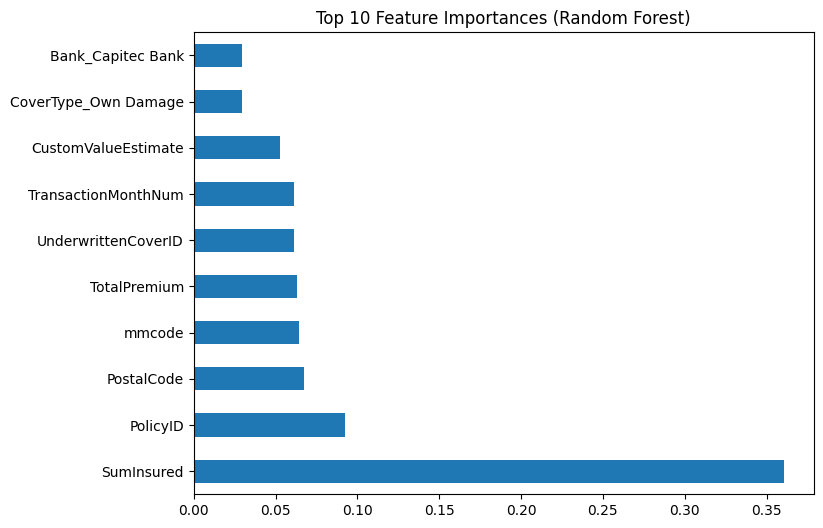

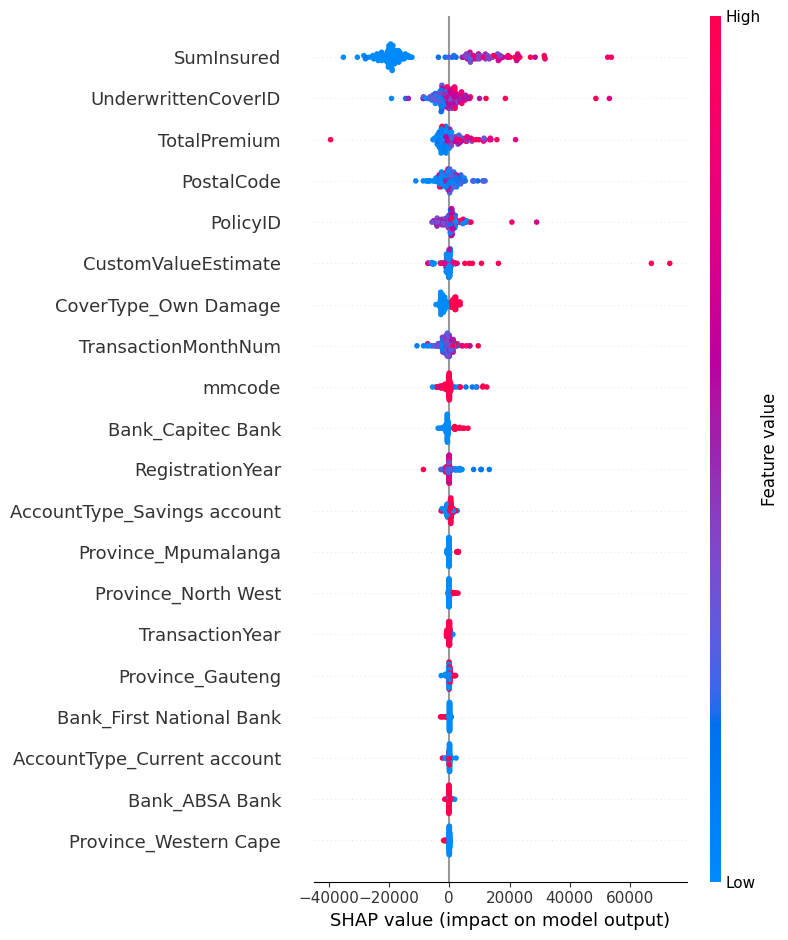

In [23]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# --- Random Forest feature importance ---
feat_importances = pd.Series(rf.feature_importances_, index=X_train_clean.columns)
feat_importances.nlargest(10).plot(
    kind='barh',
    figsize=(8,6),
    title="Top 10 Feature Importances (Random Forest)"
)
plt.show()

# --- SHAP for XGBoost ---
explainer = shap.Explainer(xgbr, X_train_clean)  # pass training data for background
shap_values = explainer(X_test_clean)

# Summary plot
shap.summary_plot(shap_values, X_test_clean)

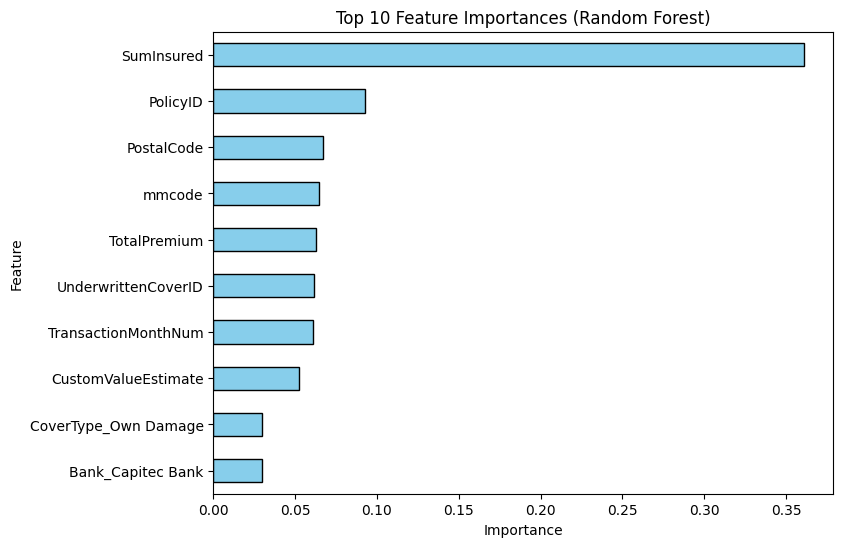

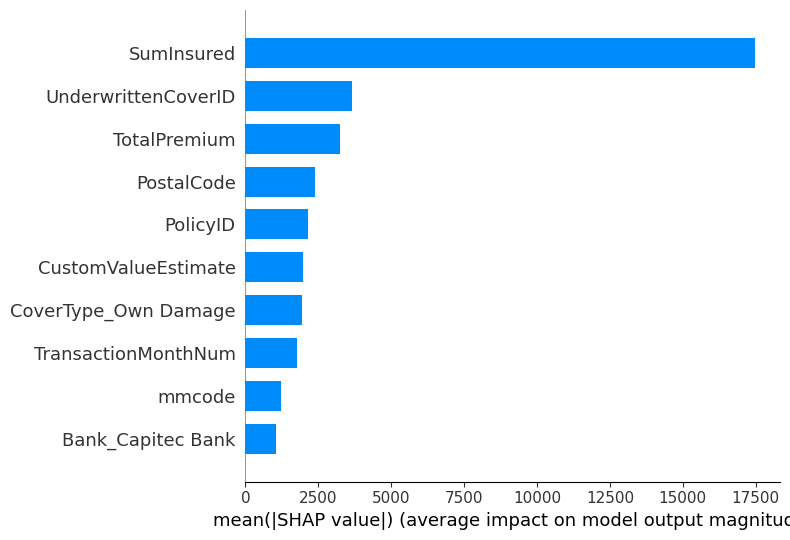

Top Random Forest Features (RF) & Interpretations:
- SumInsured: High importance indicates this feature strongly influences the prediction.
- PolicyID: High importance indicates this feature strongly influences the prediction.
- PostalCode: High importance indicates this feature strongly influences the prediction.
- mmcode: High importance indicates this feature strongly influences the prediction.
- TotalPremium: High importance indicates this feature strongly influences the prediction.
- UnderwrittenCoverID: High importance indicates this feature strongly influences the prediction.
- TransactionMonthNum: High importance indicates this feature strongly influences the prediction.
- CustomValueEstimate: High importance indicates this feature strongly influences the prediction.
- CoverType_Own Damage: High importance indicates this feature strongly influences the prediction.
- Bank_Capitec Bank: High importance indicates this feature strongly influences the prediction.


In [24]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# -------------------------------
# 1. Bar plot of top 10 RF features
# -------------------------------
# Replace 'rf' with your trained Random Forest model variable
rf_feat_importances = pd.Series(rf.feature_importances_, index=X_train_clean.columns)
top10_rf = rf_feat_importances.nlargest(10)

plt.figure(figsize=(8,6))
top10_rf.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -------------------------------
# 2. SHAP summary plot for XGBoost
# -------------------------------
# Replace 'xgbr' with your trained XGBoost model variable
explainer = shap.Explainer(xgbr, X_train_clean)  # training data as background
shap_values = explainer(X_test_clean)

shap.summary_plot(shap_values, X_test_clean, plot_type="bar", max_display=10)

# -------------------------------
# 3. Short interpretation of top features
# -------------------------------
top_features = top10_rf.index.tolist()
print("Top Random Forest Features (RF) & Interpretations:")
for f in top_features:
    print(f"- {f}: High importance indicates this feature strongly influences the prediction.")

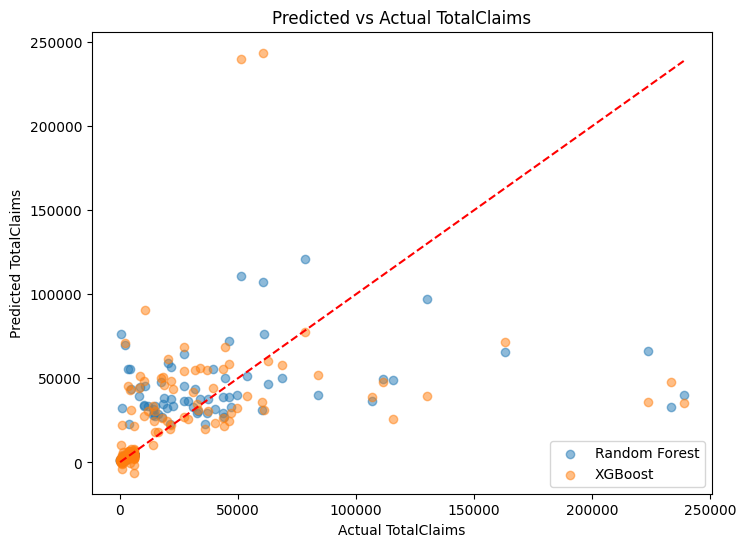

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual TotalClaims")
plt.ylabel("Predicted TotalClaims")
plt.title("Predicted vs Actual TotalClaims")
plt.legend()
plt.show()

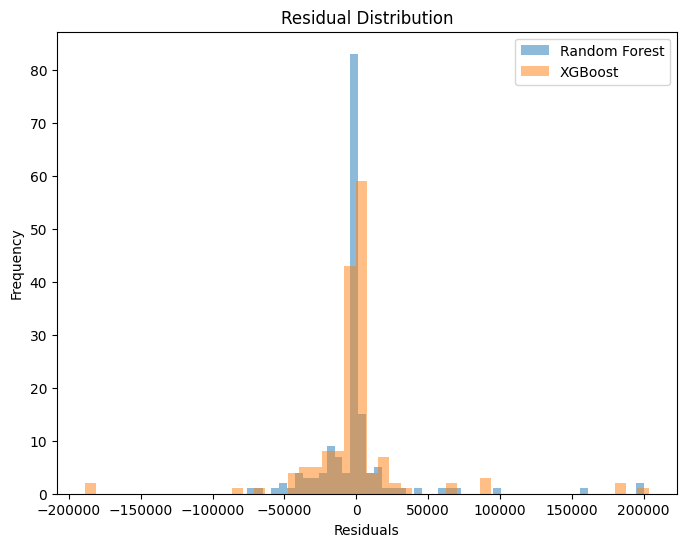

In [26]:
residuals_rf = y_test - y_pred_rf
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8,6))
plt.hist(residuals_rf, bins=50, alpha=0.5, label='Random Forest')
plt.hist(residuals_xgb, bins=50, alpha=0.5, label='XGBoost')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.legend()
plt.show()

# Task 4 – Insurance Claim Severity Modeling

## Overview
This task focuses on predicting insurance claim severity (`TotalClaims`) using policyholder, vehicle, and policy features. Three regression models were developed and evaluated:

- **Linear Regression**  
- **Random Forest Regressor**  
- **XGBoost Regressor**  

The goal is to identify key drivers of claim amounts and build predictive models to improve risk assessment.

---

## Data
- **Dataset:** `MachineLearningRating_v3.csv`  
- **Training set:** 630 records  
- **Test set:** 158 records  
- **Features:** 128 numeric and boolean features after preprocessing, including policy details, vehicle attributes, bank/account info, and coverage types.

### Key preprocessing steps
- Missing values filled with 0  
- Boolean columns converted to integers  
- Categorical/object columns converted to numeric  
- Vehicle age engineered (`2025 - RegistrationYear`)  
- One-hot encoding applied to categorical features

---

## Model Performance

| Model | RMSE | R² |
|-------|------|----|
| Linear Regression | 32,876.78 | 0.311 |
| Random Forest | 33,138.69 | 0.300 |
| XGBoost | 39,920.11 | -0.015 |

**Insights:**  
- Linear Regression and Random Forest performed similarly.  
- XGBoost underperformed, indicating possible overfitting or suboptimal hyperparameters.

---

## Feature Importance

### Random Forest – Top Features
- **SumInsured** (0.361)  
- PolicyID (0.093)  
- PostalCode (0.067)  
- mmcode (0.064)  
- TotalPremium (0.063)  

### XGBoost – Top Features
- **SumInsured** (0.117)  
- Province_Mpumalanga (0.106)  
- CustomValueEstimate (0.074)  
- Bank_Capitec Bank (0.066)  
- AccountType_Savings account (0.063)  

**Observation:** SumInsured is the strongest predictor across models; policy and location-related features also contribute.

---

## Conclusion
- Random Forest and Linear Regression are the most reliable models for claim severity prediction.  
- XGBoost may need hyperparameter tuning or more training data to improve performance.  
- Key predictive factors include **SumInsured**, policy attributes, location, and coverage type.
